In [1]:
import pandas as pd
import random

#---Import Data
raw_data = pd.read_csv('data.csv', sep=",", header = 0)
raw_data_list = raw_data.values.tolist()
print("raw_data:\n", raw_data_list, "\n")
L, W = int(raw_data_list[0][1]), int(raw_data_list[0][2])

for i in range(3):
    del(raw_data_list[0])


data=[]
for i in range(len(raw_data_list)):
    for j in range(int(raw_data_list[i][4])):
        data_list = [raw_data_list[i][0], int(raw_data_list[i][1]), int(raw_data_list[i][2]), int(raw_data_list[i][3])]
        data.append(data_list)
#random.shuffle(data)
data.sort(key=lambda x:(-x[1]))
print("data:\n",data)
#storage = [i, type, p, q, s, x', y']

raw_data:
 [['Case', '18', '16', nan, nan], [nan, nan, nan, nan, nan], ['name', 'p', 'q', 'a', 'n'], ['A', '6', '3', '18', '3'], ['B', '4', '4', '16', '4'], ['C', '3', '2', '6', '4'], ['D', '9', '9', '81', '2']] 

data:
 [['D', 9, 9, 81], ['D', 9, 9, 81], ['A', 6, 3, 18], ['A', 6, 3, 18], ['A', 6, 3, 18], ['B', 4, 4, 16], ['B', 4, 4, 16], ['B', 4, 4, 16], ['B', 4, 4, 16], ['C', 3, 2, 6], ['C', 3, 2, 6], ['C', 3, 2, 6], ['C', 3, 2, 6]]


In [2]:
def checkOverlapping(i, x_index, y_index, s, storage, case):
    #print("CheckOverlapping: (i,s)=", i,s)
    for k in range(len(storage)-1):
        #print("storage k: ", storage[k])
        condition1 = 'abs(x_index-storage[k][5])<((1-s)*storage[i][2]+s*storage[i][3]+(1-storage[k][4])*storage[k][2]+storage[k][4]*storage[k][3])/2'
        condition2 = 'abs(y_index-storage[k][6])<(s*storage[i][2]+(1-s)*storage[i][3]+storage[k][4]*storage[k][2]+(1-storage[k][4])*storage[k][3])/2'
        #print("i:", x_index, y_index, "k:", storage[j][5], storage[j][6])
        #print("condition:", eval(condition1), eval(condition2))
        if eval(condition1)==True and eval(condition2)==True:
            #print("Overlap")
            return True
            break
    return False


In [3]:
def arrangeStock(i, x_originalIndex, y_originalIndex, s, j, storage, L, W):
    #storage = [i, type, p, q, s, x', y']
    cases = ["Case1", "Case2", "Case3", "Case4"]
    #print("Original: ", x_originalIndex, y_originalIndex,"j=", j)
    for case in cases:
        x_index, y_index = x_originalIndex, y_originalIndex
        if case == "Case1":
            x_index = storage[j][5] + ((1-s)*storage[i][2]+s*storage[i][3]+(1-storage[j][4])*storage[j][2]+storage[j][4]*storage[j][3])/2
            y_index = storage[j][6] - (storage[j][4]*storage[j][2]+(1-storage[j][4])*storage[j][3])/2 + (s*storage[i][2]+(1-s)*storage[i][3])/2
            
        if case == "Case2":
            x_index = storage[j][5] - ((1-s)*storage[i][2]+s*storage[i][3]+(1-storage[j][4])*storage[j][2]+storage[j][4]*storage[j][3])/2
            y_index = storage[j][6] - (storage[j][4]*storage[j][2]+(1-storage[j][4])*storage[j][3])/2 - (s*storage[i][2]+(1-s)*storage[i][3])/2
        
        if case == "Case3":
            y_index = storage[j][6] + (s*storage[i][2]+(1-s)*storage[i][3]+storage[j][4]*storage[j][2]+(1-storage[j][4])*storage[j][3])/2
            x_index = storage[j][5] - ((1-storage[j][4])*storage[j][2]+storage[j][4]*storage[j][3])/2 + ((1-s)*storage[i][2]+s*storage[i][3])/2
        
        if case == "Case4":
            y_index = storage[j][6] - (s*storage[i][2]+(1-s)*storage[i][3]+storage[j][4]*storage[j][2]+(1-storage[j][4])*storage[j][3])/2
            x_index = storage[j][5] - ((1-storage[j][4])*storage[j][2]+storage[j][4]*storage[j][3])/2 - ((1-s)*storage[i][2]+s*storage[i][3])/2
        
        checkOL = checkOverlapping(i, x_index, y_index, s, storage, case)
        checkOFB = checkOutofBound(i, x_index, y_index, s, storage, L, W)
        #print("j= ", j, "s= ", s, case, "(", x_index, ",", y_index,") check=", checkOL, checkOFB)
        if checkOL== False and checkOFB==False:
            x_temp, y_temp = getXY(i, x_index, y_index, s, storage)
            es = [s, x_index, y_index, x_temp, y_temp, (x_temp*y_temp)]
            feasibleSolution.append(es)
    #print(feasibleSolution)
            
    #print(case, x_index, y_index)
    return feasibleSolution

In [4]:
def checkOutofBound(i, x_index, y_index, s, storage, L, W):
    #storage = [i, type, p, q, s, x', y']
    if (x_index + ((1-s)*storage[i][2]+s*storage[i][3])/2) >L:
        return True
    if (x_index - ((1-s)*storage[i][2]+s*storage[i][3])/2) <0:
        return True
    if (y_index + (s*storage[i][2]+(1-s)*storage[i][3])/2) >W:
        return True
    if (y_index - (s*storage[i][2]+(1-s)*storage[i][3])/2) <0:
        return True
    else:
        return False

In [5]:
def getXY(i, x_index, y_index, s, storage):
    storage[i][4], storage[i][5], storage[i][6] = s, x_index, y_index
    x, y = [], []
    for k in range(len(storage)):
        x.append(storage[k][5])
        y.append(storage[k][6])
    xmax_index, ymax_index = x.index(max(x)), y.index(max(y))
    x_temp = storage[xmax_index][5]+((1-storage[xmax_index][4])*storage[xmax_index][2]+storage[xmax_index][4]*storage[xmax_index][3])/2
    y_temp = storage[ymax_index][6]+(storage[ymax_index][4]*storage[ymax_index][2]+(1-storage[ymax_index][4])*storage[ymax_index][3])/2
    #print("(x, y)=", x_temp, y_temp)
    return x_temp, y_temp

In [6]:
def getOptimalSolution(feasibleSolution):
    a=[]
    for k in range(len(feasibleSolution)):
        a.append(feasibleSolution[k][5])
    if a!=[]:
        amin_index = a.index(min(a))
        return feasibleSolution[amin_index][0], feasibleSolution[amin_index][1], feasibleSolution[amin_index][2]
    else:
        return -1, -1, -1
    

In [7]:
#-----Main-----

case = ["Case1", "Case2", "Case3", "Case4"]
storage, feasibleSolution = [], []

for i in range(len(data)):
    #storage = [i, type, p, q, s, x', y']
    each = [i, data[i][0], data[i][1], data[i][2], -1, -1, -1]
    storage.append(each)
    feasibleSolutions=[]
    feasibleSolution = []
    for s in range(2):
        x_index, y_index = ((1-s)*storage[i][2]+s*storage[i][3])/2, (s*storage[i][2]+(1-s)*storage[i][3])/2
        #print("initial:", i, s, x_index, y_index)
        if i==0:
            x_temp, y_temp = getXY(i, x_index, y_index, s, storage)
            es = [s, x_index, y_index, x_temp, y_temp, (x_temp*y_temp)]
            feasibleSolution.append(es)
            #print(feasibleSolution)
            break
        for j in range(len(storage)-1):             
            feasibleSolution = arrangeStock(i, x_index, y_index, s, j, storage, L, W)
                
    for solution in feasibleSolution:
        feasibleSolutions.append(solution)
    #print("feasibleSolutions", feasibleSolutions)
    storage[i][4], storage[i][5], storage[i][6] = getOptimalSolution(feasibleSolutions)
    print("i = ", i, "storage =", storage[i])
    
#print(storage)
            
                    
                    

i =  0 storage = [0, 'D', 9, 9, 0, 4.5, 4.5]
i =  1 storage = [1, 'D', 9, 9, 0, 13.5, 4.5]
i =  2 storage = [2, 'A', 6, 3, 0, 3.0, 10.5]
i =  3 storage = [3, 'A', 6, 3, 0, 12.0, 10.5]
i =  4 storage = [4, 'A', 6, 3, 0, 3.0, 13.5]
i =  5 storage = [5, 'B', 4, 4, 0, 11.0, 14.0]
i =  6 storage = [6, 'B', 4, 4, 0, 15.0, 14.0]
i =  7 storage = [7, 'B', 4, 4, -1, -1, -1]
i =  8 storage = [8, 'B', 4, 4, -1, -1, -1]
i =  9 storage = [9, 'C', 3, 2, 0, 7.5, 10.0]
i =  10 storage = [10, 'C', 3, 2, 0, 7.5, 13.0]
i =  11 storage = [11, 'C', 3, 2, 0, 7.5, 15.0]
i =  12 storage = [12, 'C', 3, 2, 1, 16.0, 10.5]


      sx    sy name  p  q  s
0    0.0   0.0    D  9  9  0
1    9.0   0.0    D  9  9  0
2    0.0   9.0    A  6  3  0
3    9.0   9.0    A  6  3  0
4    0.0  12.0    A  6  3  0
5    9.0  12.0    B  4  4  0
6   13.0  12.0    B  4  4  0
7   13.0  12.0    B  4  4 -1
8   13.0  12.0    B  4  4 -1
9    6.0   9.0    C  3  2  0
10   6.0  12.0    C  3  2  0
11   6.0  14.0    C  3  2  0
12  15.0   9.0    C  3  2  1


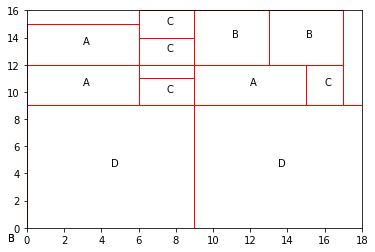

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
result=[]

for i in range(len(storage)):
    if storage[i][4]==0:
        s_x, s_y = (storage[i][5]-storage[i][2]/2), (storage[i][6]-storage[i][3]/2)
        rect = plt.Rectangle((s_x, s_y), storage[i][2], storage[i][3], fill=False, edgecolor = 'red')
    if storage[i][4]==1:
        s_x, s_y = (storage[i][5]-storage[i][3]/2), (storage[i][6]-storage[i][2]/2)
        rect = plt.Rectangle((s_x, s_y), storage[i][3], storage[i][2], fill=False, edgecolor = 'red')
    #print(s_x, s_y, storage[i][2], storage[i][3], storage[i][4])
    print_line = [s_x, s_y, storage[i][1], storage[i][2], storage[i][3], storage[i][4]]
    result.append(print_line)
    ax.text(storage[i][5], storage[i][6],storage[i][1])
    ax.add_patch(rect)

print(pd.DataFrame(result, columns = ['sx' , 'sy', 'type', 'p', 'q', 's']))
ax.add_patch(rect)
ax.set_xlim((0, L))
ax.set_ylim((0, W))
plt.show()